In recent years, the issue of gender pay disparity has garnered significant attention across various sectors, prompting researchers and policymakers to investigate the underlying factors contributing to this phenomenon. Understanding whether a gender pay gap exists is crucial for promoting equity and informing strategies aimed at closing this gap. This analysis employed a hypothesis testing approach to examine differences in average salaries between males and females within a specific dataset.

In addition to gender, the analysis also considered critical factors such as years of experience and age, which can significantly influence salary levels. By incorporating these variables into our examination, we aimed to provide a more nuanced understanding of the dynamics at play in salary disparities. Through statistical methods, we sought to illuminate the existence and extent of any disparities in earnings, ultimately contributing to the ongoing dialogue surrounding gender equality in the workplace.

PROCESS FLOW

•	Data Extraction -  data source kaggle , downloaded it and uploaded it to my GitHub for easy retrieval.

•	Data Cleaning -  This involved removing null values, Also checking the fields are correct in terms of spelling.

•	EDA – Created visualizations to show the distribution of the dataset, correlations and analyzing the data.

•	Hypothesis Testing- Proving NULL and Alternate Hypothesis.


## 1.IMPORTING LIBRARIES AND DATA EXTRACTION##

In [2]:
#prerequisuites
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Read data with the path to the CSV file to read a comma-separated values file.

[**Link to salary dataset**](https://raw.githubusercontent.com/waithera-shop/salary_data/main/Salary_Data.csv)

In [3]:
# Reading data from CSV
# Data Extraction

file_path = "https://raw.githubusercontent.com/waithera-shop/salary_data/main/Salary_Data.csv"
Salary_data= pd.read_csv(file_path)
Salary_data



,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [4]:
#Get salary info, types
Salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [5]:
#Describing info contained in the data
Salary_data.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


##2.DATA CLEANING FOR ANALYSIS

In [6]:
#check for null values
Salary_data.isnull().sum()

,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5


- There are null values available in the data set.
- Cleaning begins by removing ull values present.

In [7]:
#droping null values
#print again to ascertain
Salary_data.dropna(inplace=True)
Salary_data.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


## Adding a new column for Experience Range By categorization

In [8]:
#Check max and minimum Years of Experience
Salary_data['Years of Experience'].max()
Salary_data['Years of Experience'].min()
print(Salary_data['Years of Experience'].max())
print(Salary_data['Years of Experience'].min())

34.0
0.0


In [9]:
def categorize(value):
    if value <= 5:
        return '0-5'
    elif value <= 11:
        return '6-11'
    elif value <= 16:
        return '12-16'
    elif value <= 21:
        return '17-21'
    elif value <= 26:
        return '22-26'
    else:
        return '27-34'

Salary_data['Range_Experience'] = Salary_data['Years of Experience'].apply(categorize)

Salary_data.sample(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Range_Experience
2490,30.0,Male,Master's Degree,Full Stack Engineer,6.0,105725.0,6-11
6194,30.0,Female,Bachelor's Degree,Marketing Coordinator,5.0,95000.0,0-5
4992,28.0,Female,PhD,Director of Marketing,6.0,105000.0,6-11
6284,40.0,Male,PhD,Sales Director,14.0,140000.0,12-16
3081,45.0,Male,Master's Degree,Senior Software Engineer,22.0,182506.0,22-26
3644,29.0,Female,Master's Degree,Software Developer,5.0,70000.0,0-5
4802,28.0,Male,Bachelor's Degree,Junior Data Analyst,3.0,52000.0,0-5
3159,23.0,Female,Bachelor's Degree,Software Engineer,1.0,50000.0,0-5
3003,30.0,Female,Master's Degree,Full Stack Engineer,6.0,110707.0,6-11
2765,25.0,Female,Master's Degree,Software Engineer,2.0,60000.0,0-5


##Adding a Age Range Column to the dataset

In [10]:
# Check maximun and minimum Ages
Salary_data['Age'].max()
Salary_data['Age'].min()
print(Salary_data['Age'].max())
print(Salary_data['Age'].min())


62.0
21.0


In [11]:
def categorize(value):
    if value <= 28:
        return '23-28'
    elif value <= 34:
        return '29-34'
    elif value <= 40:
        return '35-40'
    elif value <= 46:
        return '41-46'
    elif value <= 52:
        return '47-52'
    elif value <= 58:
        return '53-58'
    else:
        return '59-62'

Salary_data['Age_Range'] = Salary_data['Age'].apply(categorize)

Salary_data.sample(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Range_Experience,Age_Range
129,34.0,Male,Master's,Senior Software Developer,8.0,105000.0,6-11,29-34
4109,39.0,Female,Master's Degree,Marketing Coordinator,11.0,120000.0,6-11,35-40
4428,28.0,Female,Bachelor's Degree,Junior Software Developer,2.0,37000.0,0-5,23-28
5101,26.0,Male,Bachelor's Degree,Senior Product Marketing Manager,5.0,85000.0,0-5,23-28
479,27.0,Male,PhD,Data Scientist,2.0,115000.0,0-5,23-28
3994,40.0,Female,Master's Degree,Human Resources Manager,12.0,130000.0,12-16,35-40
5149,34.0,Female,PhD,Research Director,10.0,150000.0,6-11,29-34
769,28.0,Female,Bachelor's,Software Engineer,5.0,160000.0,0-5,23-28
6662,42.0,Male,Bachelor's Degree,Financial Manager,13.0,130000.0,12-16,41-46
1213,37.0,Male,Master's Degree,Senior Project Engineer,9.0,145000.0,6-11,35-40


In [12]:
# Replace other in Gender with Prefer Not To say
Salary_data['Gender'] = Salary_data['Gender'].replace('Other', 'Prefer Not To Say')
Salary_data.sample(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Range_Experience,Age_Range
4487,45.0,Male,Master's Degree,Marketing Manager,20.0,204000.0,17-21,41-46
5302,27.0,Male,Bachelor's Degree,Marketing Analyst,2.0,50000.0,0-5,23-28
5951,31.0,Female,PhD,Data Scientist,8.0,140000.0,6-11,29-34
2377,43.0,Male,Master's Degree,Senior Software Engineer,21.0,187081.0,17-21,41-46
1562,24.0,Male,Bachelor's Degree,Front end Developer,1.0,55000.0,0-5,23-28
4178,34.0,Female,Bachelor's Degree,Human Resources Manager,9.0,99000.0,6-11,29-34
1133,25.0,Female,Bachelor's,Data Analyst,2.0,90000.0,0-5,23-28
3940,31.0,Male,Bachelor's Degree,Operations Manager,6.0,75000.0,6-11,29-34
6536,45.0,Male,Master's Degree,Marketing Manager,13.0,130000.0,12-16,41-46
2890,26.0,Male,Master's Degree,Full Stack Engineer,3.0,70216.0,0-5,23-28


In [13]:
# Replace bachelor's  with bahelor's Degree
Salary_data['Education Level'] = Salary_data['Education Level'].replace('Bachelor\'s', "Bachelor's Degree")
Salary_data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Range_Experience,Age_Range
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,0-5,29-34
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0-5,23-28
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,12-16,41-46
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,6-11,35-40
4,52.0,Male,Master's,Director,20.0,200000.0,17-21,47-52
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,17-21,47-52
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,0-5,29-34
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,0-5,29-34
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,12-16,41-46


In [14]:
# Replace bachelor's  with Master's Degree
Salary_data['Education Level'] = Salary_data['Education Level'].replace('Master\'s', "Master's Degree")
Salary_data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Range_Experience,Age_Range
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,0-5,29-34
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,0-5,23-28
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,12-16,41-46
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,6-11,35-40
4,52.0,Male,Master's Degree,Director,20.0,200000.0,17-21,47-52
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,17-21,47-52
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,0-5,29-34
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,0-5,29-34
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,12-16,41-46


In [15]:
#Replace pHD with PhD
Salary_data['Education Level'] = Salary_data['Education Level'].replace('phD', 'PhD')
Salary_data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Range_Experience,Age_Range
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,0-5,29-34
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,0-5,23-28
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,12-16,41-46
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,6-11,35-40
4,52.0,Male,Master's Degree,Director,20.0,200000.0,17-21,47-52
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,17-21,47-52
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,0-5,29-34
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,0-5,29-34
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,12-16,41-46


## 3.EXPLATORY DATA ANALYSIS
#Summary of the data
- Age vs Gender distribution
- Gender Distribution
- Education Level
- Age Distribution

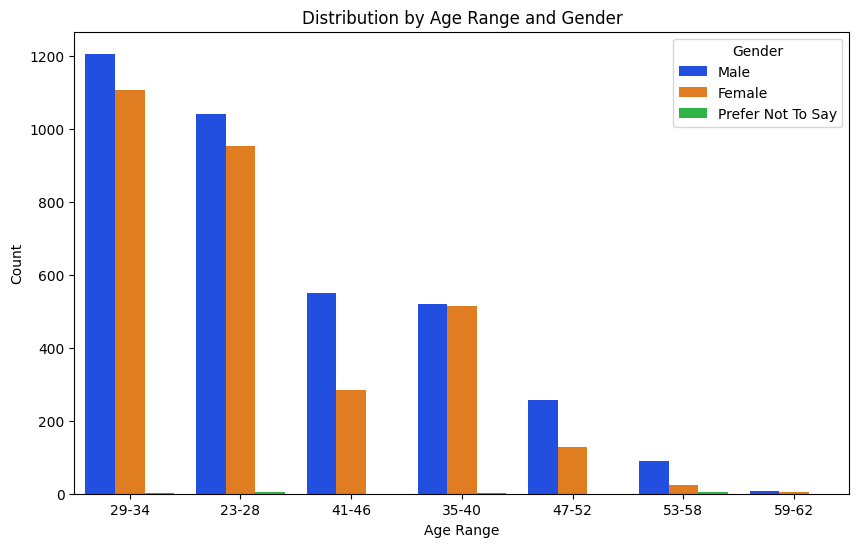

In [ ]:

#Checking distribution across the different Genders
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Range', data=Salary_data, hue='Gender', palette='bright')
plt.title('Distribution by Age Range and Gender')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

The visualization highlights a pronounced trend of declining employment rates as age increases, impacting both genders. Interestingly, male employees consistently outnumber their female counterparts across all age groups, underscoring a persistent gender disparity in the workforce.

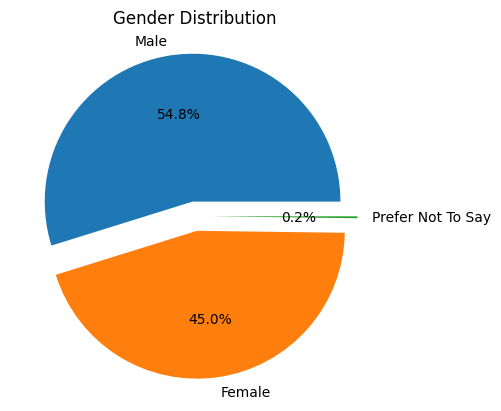

In [ ]:
## visualizing  Count of gender distribution

# Gender Distribution
gender_distribution = Salary_data['Gender'].value_counts()

# Get the labels from the series index
labels = gender_distribution.index

# Explode the "Prefer Not To Say" slice
explode = (0.1, 0.1, 0.1)  # Explode the third slice (Prefer Not To Say)

plt.pie(gender_distribution, autopct='%1.1f%%', labels=labels, explode=explode)
plt.title('Gender Distribution')
plt.show()

This visualization illustrates the gender distribution within the dataset. It highlights that the majority of individuals identify as male, followed by female, with a small percentage preferring not to disclose their gender

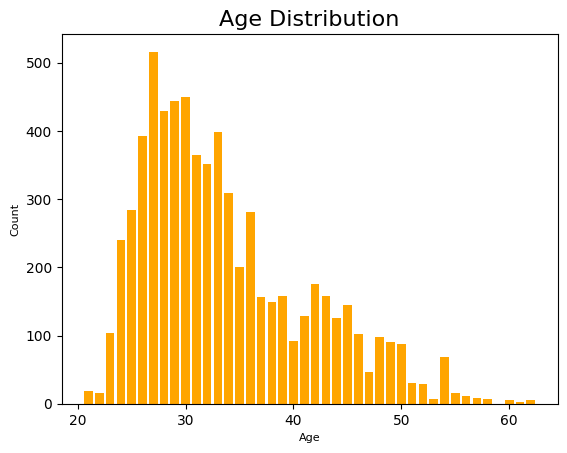

In [ ]:
#Create a Bar chart showing Age Distribution
age = Salary_data['Age'].value_counts().sort_index()
plt.bar(age.index, age.values, color='Orange')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.show()

This visualization illustrates the distribution of individuals across different age groups within the dataset

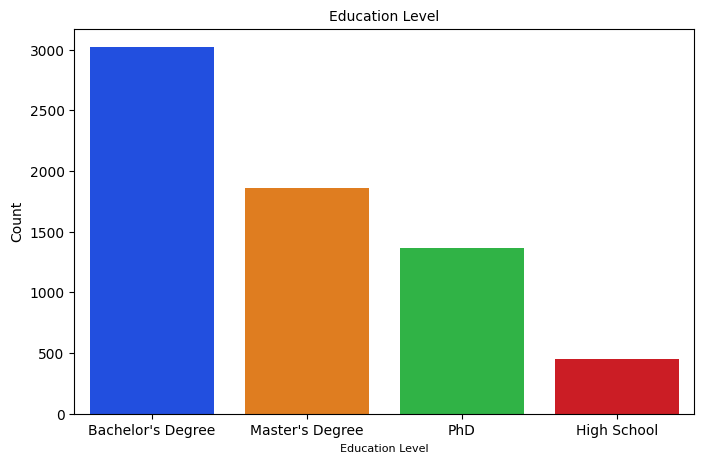

In [ ]:
#Create a Bar chart showing levels of Education
plt.figure(figsize=(8, 5))
sns.countplot(Salary_data, x='Education Level', palette='bright', hue ='Education Level' )
plt.title('Education Level',fontsize=10)
plt.xlabel('Education Level',fontsize=8)
plt.ylabel('Count')
plt.show()


This visualization effectively depicts the distribution of individuals across various education levels within the dataset, providing valuable insights into educational attainment trends.

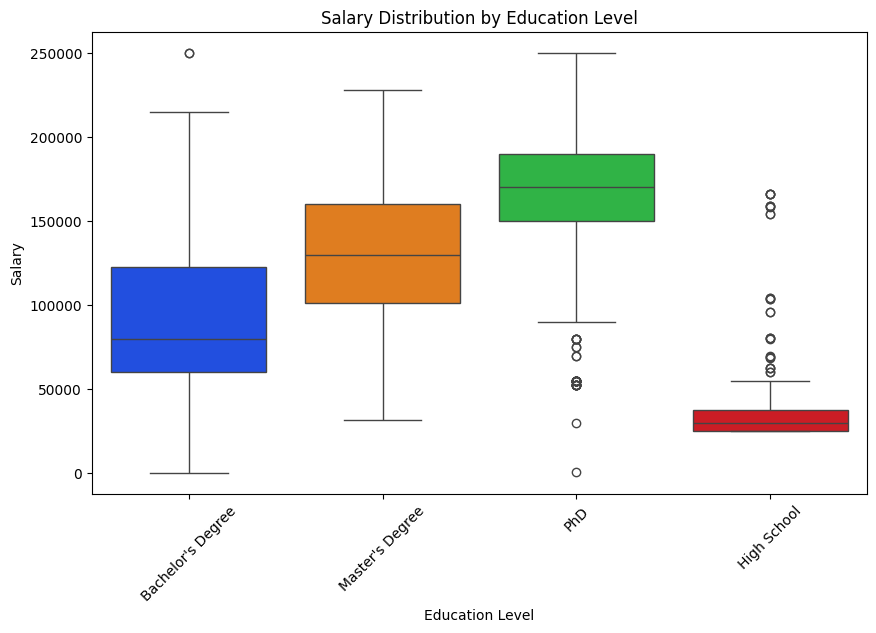

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education Level', y='Salary', data=Salary_data, palette='bright' , hue = 'Education Level')
plt.title('Salary Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

This visualization showcases the distribution of salaries across different education levels within the dataset. It clearly demonstrates that individuals with PhDs command the highest salaries, followed closely by those holding Master's degrees, while individuals with High School diplomas earn the lowest on average.

#Checking correlation of various factors

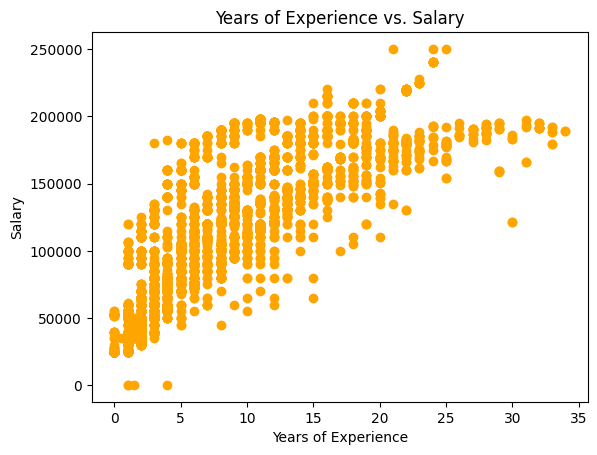

In [ ]:
## checking relation between years of experience and salary
plt.scatter(Salary_data['Years of Experience'], Salary_data['Salary'] ,color = 'Orange')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs. Salary')
plt.show()

In [ ]:
#Check correlation between Salary and Years of experience
correlation = Salary_data['Years of Experience'].corr(Salary_data['Salary'])
print(f"Correlation between experience and salary: {correlation}")


Correlation between experience and salary: 0.8089681695139437


Key Insight: A strong positive correlation exists between salary and years of experience

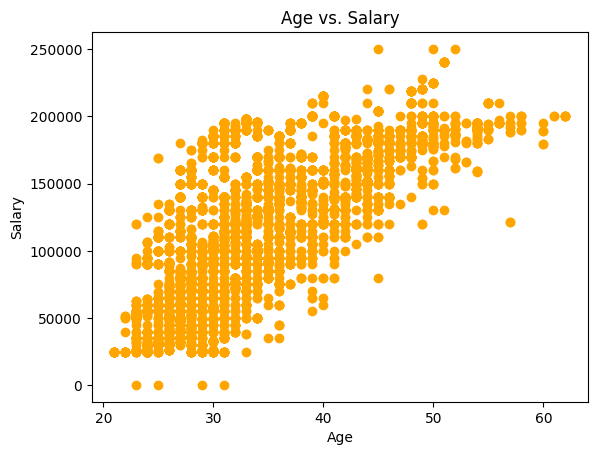

In [ ]:
##Create a scatter plot to show relation between Age and salary
plt.scatter(Salary_data['Age'], Salary_data['Salary'] , color = 'Orange')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs. Salary')
plt.show()

In [ ]:
#Check correlation between Salary and Years of experience
correlation = Salary_data['Age'].corr(Salary_data['Salary'])
print(f"Correlation between Age and salary: {correlation}")

Correlation between Age and salary: 0.7280606296367428


Key Insight: A strong positive correlation exists between salary and Age

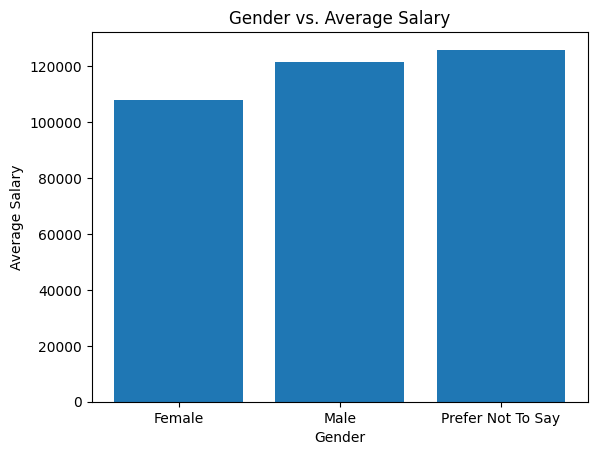

In [ ]:

# Calculate the average salary for each gender
gender_salary = Salary_data.groupby('Gender')['Salary'].mean()

# Create a bar plot
plt.bar(gender_salary.index, gender_salary.values)
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.title('Gender vs. Average Salary')
plt.show()

This visualization illustrates the distribution of salaries across different genders within the dataset. It reveals a disparity between male and female employees, with males earning higher salaries on average.

Potential Contributing Factors:

1.The dataset contains a higher proportion of male employees, which can inflate the average salary for males.

2.There's a higher representation of males with PhDs, a factor known to positively correlate with higher salaries

3.There is a positive correlation between individuals who prefer not to disclose their gender and years of experience. This correlation suggests that these individuals tend to have more experience and, consequently, may command higher salaries


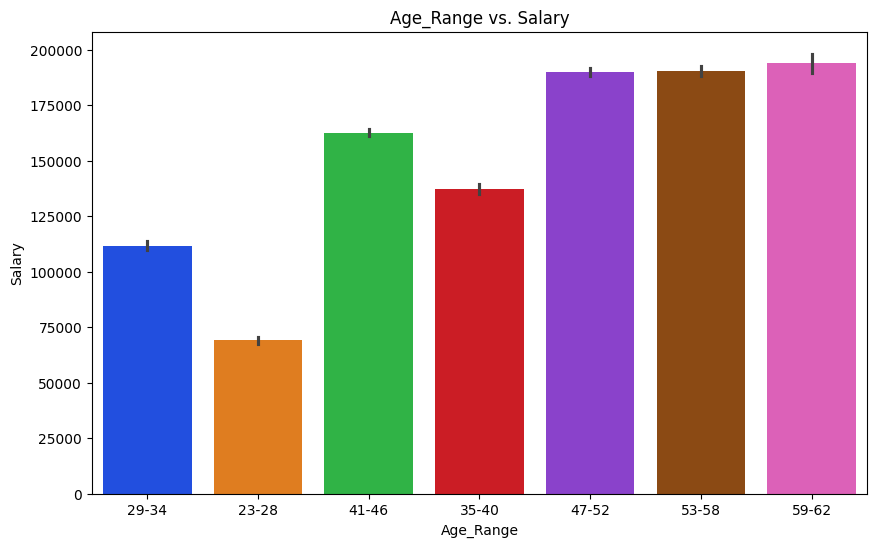

In [ ]:
#Create a bar chart of Age range vs salary
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Range', y='Salary', data=Salary_data, hue='Age_Range', palette='bright', legend=False)
plt.title('Age_Range vs. Salary')
plt.xlabel('Age_Range')
plt.ylabel('Salary')
plt.show()

This analysis reveals a positive correlation between age and salary, suggesting that older employees tend to earn higher wages on average.

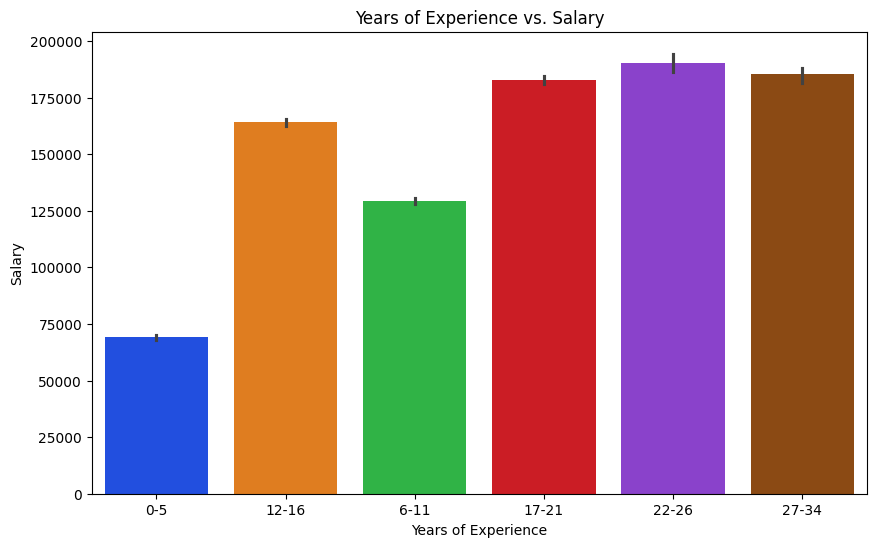

In [ ]:
#Create a bar chart of Age range vs salary
plt.figure(figsize=(10, 6))
sns.barplot(x='Range_Experience', y='Salary', data=Salary_data, hue='Range_Experience', palette='bright', legend=False)
plt.title('Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

This analysis reveals a positive correlation between years of experience and salary, suggesting that increased work experience is generally associated with higher earnings. Notably, employees with 22-26 years of experience demonstrate the highest earning potential within the dataset.
Potential Cause  would be Low population after 26 years of experience.

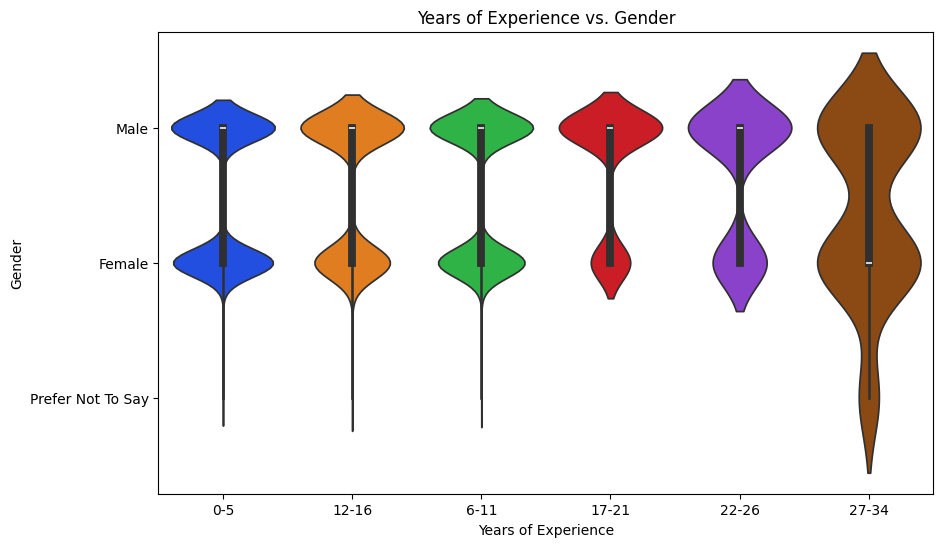

In [ ]:
#Create a bar chart of Age range vs salary
plt.figure(figsize=(10, 6))
sns.violinplot(x='Range_Experience', y='Gender', data=Salary_data, hue='Range_Experience', palette='bright', legend=False)
plt.title('Years of Experience vs. Gender')
plt.xlabel('Years of Experience')
plt.ylabel('Gender')
plt.show()

The visualization indicates a relatively even distribution of employees within the 27-34 years of experience range


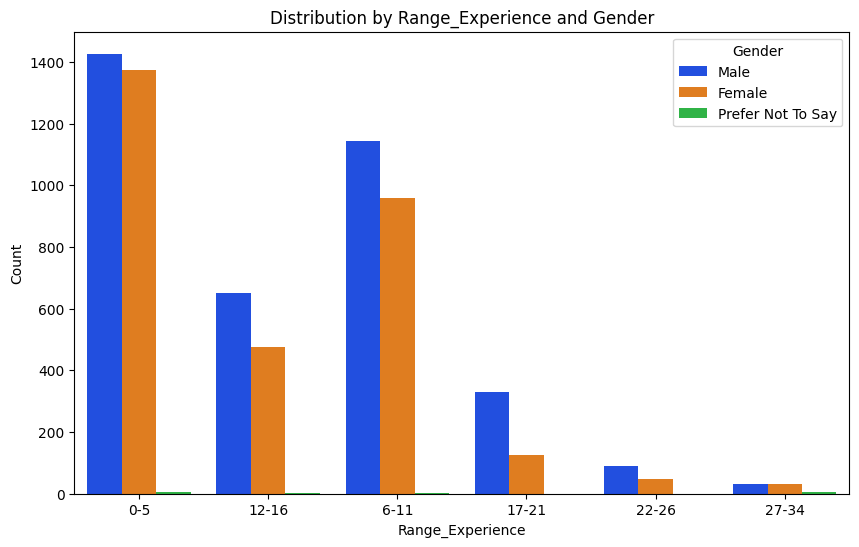

In [ ]:
#Checking distribution across the different Genders
plt.figure(figsize=(10, 6))
sns.countplot(x='Range_Experience', data=Salary_data, hue='Gender', palette='bright')
plt.title('Distribution by Range_Experience and Gender')
plt.xlabel('Range_Experience')
plt.ylabel('Count')
plt.show()

The visualization reveals a clear trend of declining employment rates with increasing years of experience, affecting both genders. Notably, male employees consistently outnumber female employees across all range groups.

In [ ]:
#print out count of job titles of female gender
female_job_counts = Salary_data[Salary_data['Gender'] == 'Female']['Job Title'].value_counts()
print(female_job_counts)

Job Title
Data Scientist                   202
Software Engineer                193
Marketing Manager                181
Full Stack Engineer              163
Marketing Coordinator            157
                                ... 
Senior HR Specialist               1
Senior Scientist                   1
Junior Operations Coordinator      1
Senior Operations Coordinator      1
Senior Account Manager             1
Name: count, Length: 131, dtype: int64


The analysis highlights the most common career paths among female employees, with Data Science emerging as the most prevalent.

In [ ]:
#print out count of job titles of female gender
Male_job_counts = Salary_data[Salary_data['Gender'] == 'Male']['Job Title'].value_counts()
print(Male_job_counts)

Job Title
Software Engineer                 325
Software Engineer Manager         276
Data Scientist                    251
Data Analyst                      234
Senior Project Engineer           213
                                 ... 
Junior Advertising Coordinator      1
Senior Accountant                   1
Junior Account Manager              1
Director of Finance                 1
Senior IT Project Manager           1
Name: count, Length: 133, dtype: int64


The analysis highlights the most common career paths among Male employees, with Software Engineer emerging as the most prevalent.

#4.Hypthesis Testing
Hypothesis : There is no difference in average salaries between males and females.

In [18]:
from scipy import stats

# Assuming your data is in a pandas DataFrame called 'Salary_data'

# Separate male and female salaries
male_salaries = Salary_data[Salary_data['Gender'] == 'Male']['Salary']
female_salaries = Salary_data[Salary_data['Gender'] == 'Female']['Salary']

# Calculate sample means and standard deviations
male_mean = male_salaries.mean()
female_mean = female_salaries.mean()
male_std = male_salaries.std()
female_std = female_salaries.std()

# Calculate sample sizes
male_n = len(male_salaries)
female_n = len(female_salaries)

# Calculate z-statistic
z_statistic = (male_mean - female_mean) / np.sqrt((male_std**2 / male_n) + (female_std**2 / female_n))

# Calculate p-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))

# Print results
print(f"Z-statistic: {z_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

# Set significance level (alpha)
alpha = 0.05

# Interpret results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average salaries between males and females.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average salaries between males and females.")

Z-statistic: 10.48
P-value: 0.000
Reject the null hypothesis. There is a significant difference in average salaries between males and females.


KEYINSIGHT : Based on the results of the hypothesis test, there is sufficient evidence to reject the null hypothesis that there is no difference in average salaries between males and females. The calculated p-value was found to be less than the significance level (alpha) of 0.05, indicating a statistically significant difference in average salaries between the two genders. This suggests that there is a gender pay gap within the analyzed dataset, with males earning higher salaries on average compared to females.

In conclusion, the analysis provides compelling evidence of a gender pay gap within the dataset, as demonstrated by the hypothesis test results. The rejection of the null hypothesis indicates a statistically significant difference in average salaries between males and females, with males earning higher wages on average. This finding underscores the importance of addressing gender disparities in compensation and highlights the need for ongoing efforts to promote equity in the workplace. By considering additional factors such as years of experience and age, we can better understand the complexities surrounding salary differences and work towards effective strategies for closing the gender pay gap. Ultimately, these insights contribute to the broader conversation about achieving gender equality in professional environments.